In [19]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox
import pandas as pd

In [20]:
file_path = '/content/drive/MyDrive/mpd_stats_gp_2.xlsx'

df = pd.read_excel(file_path, sheet_name='sp12m_result')


AR coefficients: [0.]
AR coefficients: [0.]
AR coefficients: [0.]
                                GLSAR Regression Results                               
Dep. Variable:           Logdiff(SPX)   R-squared (uncentered):                   0.250
Model:                          GLSAR   Adj. R-squared (uncentered):              0.248
Method:                 Least Squares   F-statistic:                              113.7
Date:                Thu, 29 Feb 2024   Prob (F-statistic):                    2.41e-43
Time:                        20:21:33   Log-Likelihood:                          905.94
No. Observations:                 684   AIC:                                     -1808.
Df Residuals:                     682   BIC:                                     -1799.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|

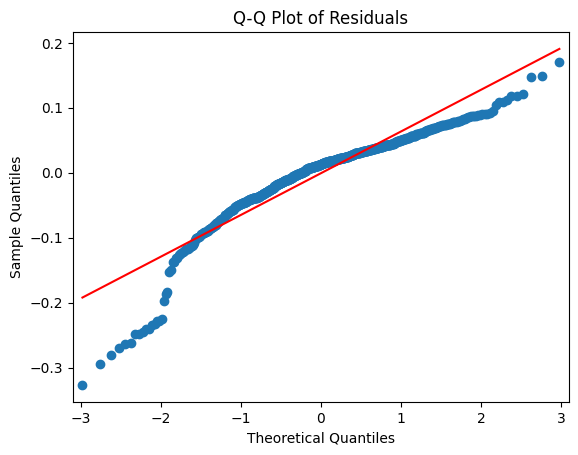

In [24]:
X = df[['prDec', 'prInc']]  # Features (two x variables)
y = df['Logdiff(SPX)']  # Dependent variable

# Initialize GLSAR model with an AR(p) error structure
# Start with p=1 for AR(1)
glsar_model = sm.GLSAR(y, X, rho=1)

# Iteratively fit the model and update the rho parameter
for i in range(3):
    glsar_results = glsar_model.iterative_fit(maxiter=1)
    print('AR coefficients:', glsar_model.rho)


print(glsar_results.summary())

print("Fitted AR parameters:", glsar_model.rho)


# Ljung-Box test on the residuals to check for autocorrelation
lb_test = acorr_ljungbox(glsar_results.resid, lags=[10], return_df=True)  # Adjust lags as appropriate
print(lb_test)


# Q-Q plot to check for normality of the residuals
qqplot(glsar_results.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


